# **Iris Dataset: K-Means Clustering vs. Neural Networks**
### Krishin Parikh
This mini tutorial will compare and contrast two machine learning algorithms — k-means clustering and a two-layer neural network — on the classic iris dataset. 

Let's start by importing all necessary libraries, loading the dataset, and initializing some variables.

In [831]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier

In [832]:
df = pd.read_csv('irisdata.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [833]:
y = df.species # training set outputs
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features] # training set inputs

# converting y labels into integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# make a small test set, produced by taking a subset of the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## K-Means Clustering
K-means clustering is an unsupervised algorithm that partitions data into k clusters by iteratively minimizing the distance between data points and their cluster centroids. Initially, it randomly selects centroids, assigns data points to the nearest centroid, and then updates the centroids as the mean of the assigned points. This process repeats until centroids stabilize or the maximum number of iterations is reached, aiming to minimize within-cluster variance.

In [834]:
kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X_train)

y_pred = kmeans.predict(X_test)

We can evaluate our model using a confusion matrix, a representation whereby each row corresponds to the true labels, and each column corresponds to the predicted labels.

In [835]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 0 11  0]
 [ 0  0 13]
 [ 3  0  3]]


The k-means model correctly classified classes 0 and 1. However, three observations in class 2 were misclassified as class 0. This already highlights one drawback of k-means clustering: it is highly sensitive to outliers because it minimizes the sum of squared distances, which can be disproportionately affected by extreme values.

We can see this visually, too, by plotting two of the features and the three centroids.

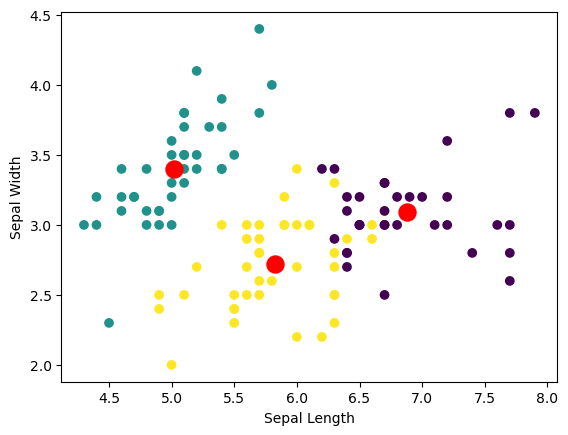

In [836]:
centroids = kmeans.cluster_centers_
cluster_assignments = kmeans.labels_

plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=cluster_assignments, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=150)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Here is a 3D representation.

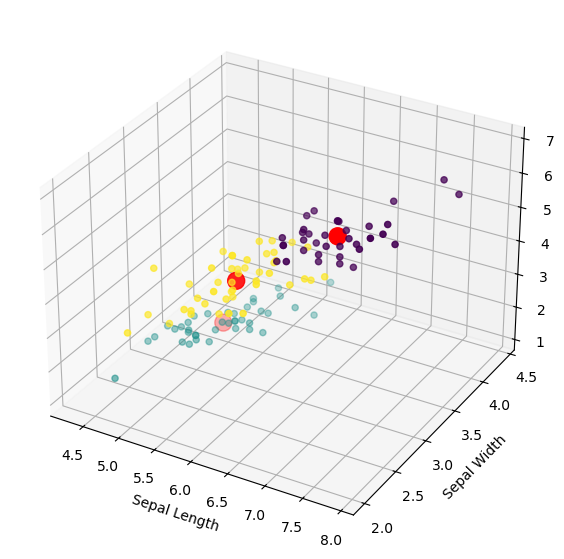

In [837]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    X_train['sepal_length'], X_train['sepal_width'], X_train['petal_length'],
    c=cluster_assignments, cmap='viridis', label='Data Points'
)

ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='red', s=150, label='Centroids'
)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.show()

However, its speed stands out as a strength. With randomly initialized centroids, it only needed 4 iterations until convergence. 

In [838]:
print(kmeans.n_iter_)

4


## Neural Network
A hidden layer neural network transforms input data through layers of interconnected neurons, where each neuron applies a weighted sum of inputs, adds a bias, and passes the result through an activation function. The network continually adjusts the weights and biases using backpropagation, a process that updates these parameters via an optimization algorithm like stochastic gradient descent.

We will first create a neural network with one hidden layer that has 100 neurons.

Since there are 4 features in our dataset, there are 4 * 100 = 400 weights and 100 biases in the network to be optimized.

In [839]:
# create a neural network with one 100-neuron hidden layer, a ReLU activation, and an optimized stochastic gradient descent
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=0, max_iter=200)

# training the model
mlp.fit(X_train, y_train)

# run the test set through the neural net and store the outputs
y_pred = mlp.predict(X_test)

# MSE from result
error = mean_absolute_error(y_test, y_pred)

print(error)

0.0


The mean absolute error (MAE) is 0 with this set of parameters, meaning it 100% accurately classified the training and test data.

Let's explore how the number of neurons in the hidden layer affects the model's performance. We will plot the MAE as a function of the number of hidden layer neurons.

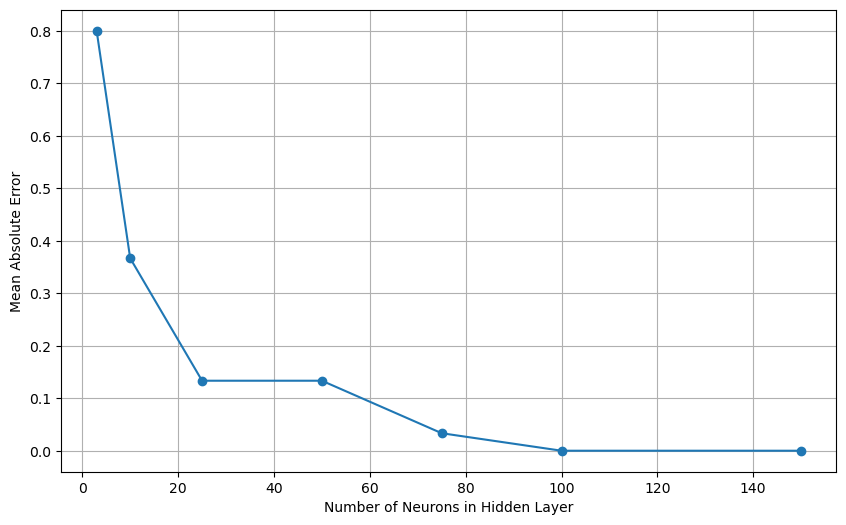

In [ ]:
neuron_range = [3, 10, 25, 50, 75, 100, 150]
error_scores = []

for neurons in neuron_range:
    mlp = MLPClassifier(hidden_layer_sizes=(neurons,), activation='relu', solver='adam', max_iter=200, random_state=0)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    error = mean_absolute_error(y_test, y_pred)
    error_scores.append(error)

plt.figure(figsize=(10, 6))
plt.plot(neuron_range, error_scores, marker='o')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()


As seen, more neurons in the hidden layers decreases the error.

Let's see how the number of neurons affects the learning curve. 

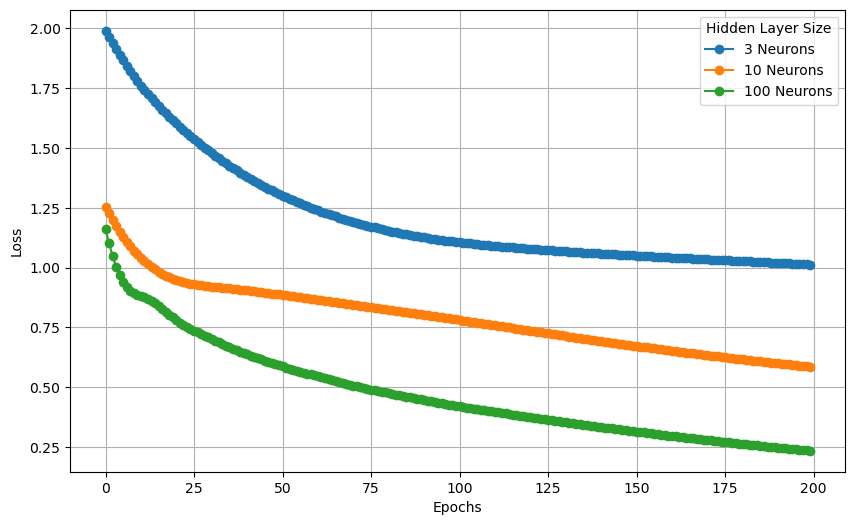

In [841]:
neuron_range = [3, 10, 100]

plt.figure(figsize=(10, 6))

for neurons in neuron_range:
    mlp = MLPClassifier(hidden_layer_sizes=(neurons,), activation='relu', solver='adam', random_state=0, max_iter=200)
    mlp.fit(X_train, y_train)

    plt.plot(mlp.loss_curve_, marker='o', label=f'{neurons} Neurons')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(title='Hidden Layer Size')
plt.grid()
plt.show()

## Conclusion
So, which is better: k-means clustering or a neural network?

The answer is that it depends on your specific situation and goals.

In our example, we saw that k-means clustering less accurately classified the data, whereas the trained hidden layer neural network could classify with 100% accuracy. Thus for this dataset, it makes far more sense to implement a neural network.

However, there are datasets that have millions of observations and thousands of features. K-means is computationally efficient for moderately sized datasets, but it struggles as the data size and dimensionality grow, particularly due to repeated distance computations for each data point during centroid updates. While neural networks require extensive computational power and large labeled datasets for supervised learning, they excel in capturing intricate patterns and relationships in data.